# PREDICTING CUSTOMER CHURN IN THE TELCOM

Customer attrition (a.k.a customer churn) is one of the biggest expenditures of any organization. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold. i WILL make use of a customer transaction dataset from Kaggle to understand the key steps involved in predicting customer attrition in Python.

**WHAT THE ANALYSIS SEEKS TO ANSWER**

**I'll attempt to solve some of the key business challenges pertaining to customer attrition like say**

**1. what is the likelihood of an active customer leaving an organization?**

**2. what are key indicators of a customer churn?**

**3. what retention strategies can be implemented based on the results to diminish prospective customer churn?**

Section A: Data Preprocessing

Section B: Data Evaluation

Section C: Model Selection

Section D: Model Evaluation

Section E: Model Improvement

Section F: Future Predictions

Section G: Model Deployment

In [1]:
#Restart the session
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
# Load library
import csv
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


import datetime as dt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
data=pd.read_csv('customer_churn_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**A quick describe method reveals that the telecom customers are staying on average for 32 months and are paying $65 per month. However, this could potentially be because different customers have different contracts.**

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#checking for missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#looking at the unique values in each feature
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Payment Methods’ and ‘Contract’ are the two categorical variables in the dataset. When we look into the unique values in each categorical variables, we get an insight that the customers are either on a month-to-month rolling contract or on a fixed contract for one/two years. Also, they are paying bills via credit card, bank transfer or electronic checks.

In [11]:
#checking for target variable distribution 
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Cleaning

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'] = data['TotalCharges'].astype("float")

# Data Evaluation; Exploratory Data Analysis

In [13]:
#Create a label encoder object, Label Encoding will be used for columns with 2 or less unique 
#le = LabelEncoder()
for col in data.columns[1:]:
    if data[col].dtypes=='object':
        print(col)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


**ANALYSIS ON THE CATEGORICAL VARIABLES**

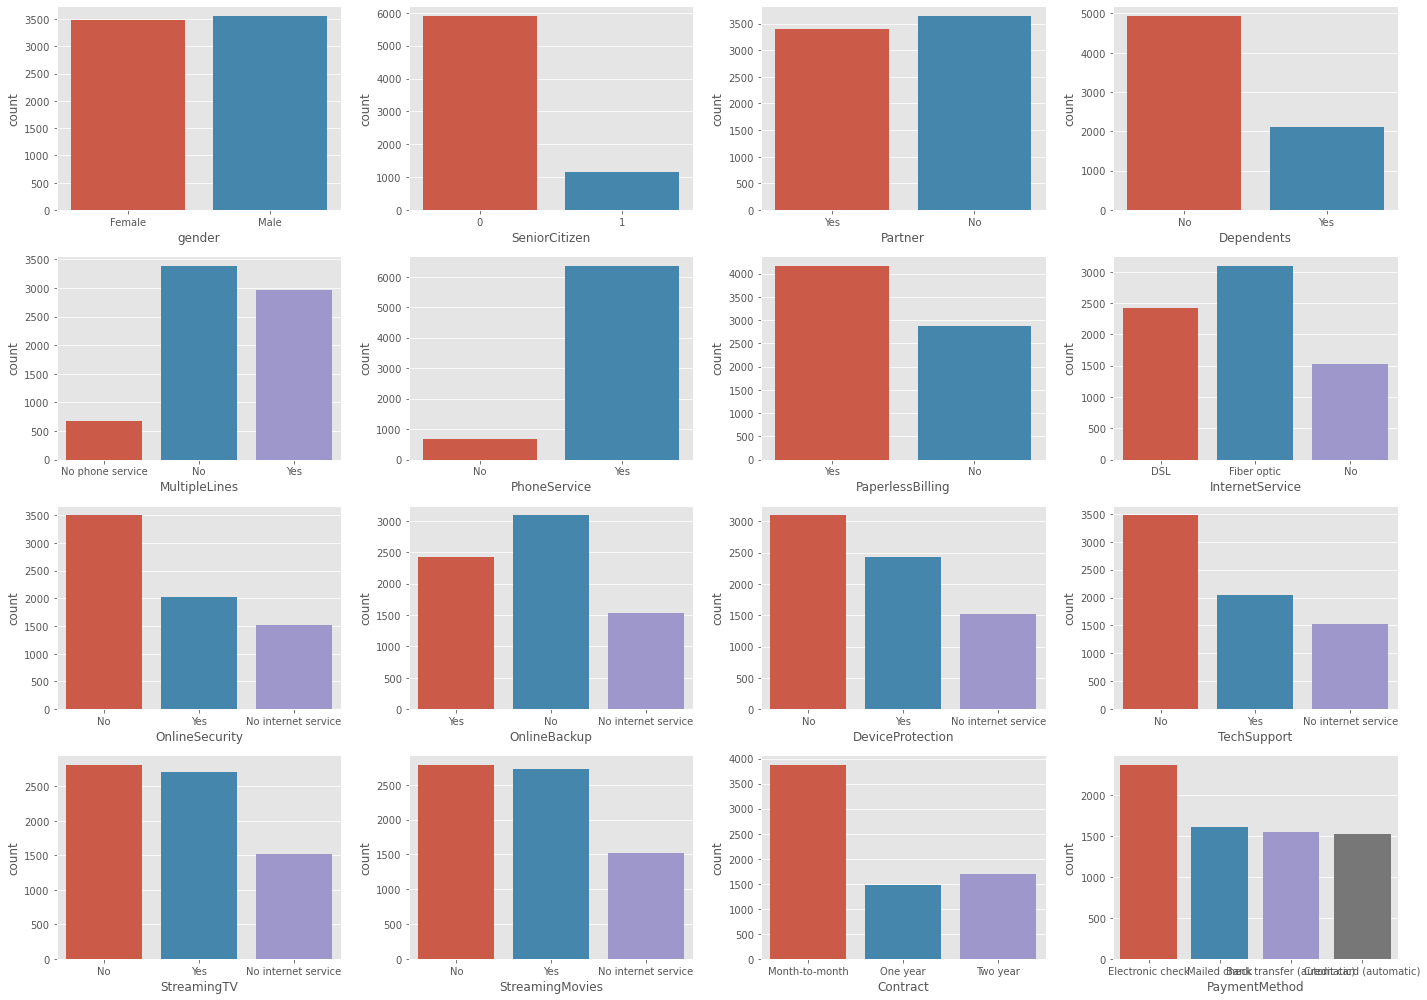

In [14]:

fig, ax=plt.subplots(4,4, figsize=(20,14))
sns.countplot(data['gender'], ax=ax[0,0])
sns.countplot(data['SeniorCitizen'], ax=ax[0,1])
sns.countplot(data['Partner'], ax=ax[0,2])
sns.countplot(data['Dependents'], ax=ax[0,3])
sns.countplot(data['MultipleLines'], ax=ax[1,0])
sns.countplot(data['PhoneService'], ax=ax[1,1])
sns.countplot(data['PaperlessBilling'], ax=ax[1,2])
sns.countplot(data['InternetService'], ax=ax[1,3])
sns.countplot(data['OnlineSecurity'], ax=ax[2,0])
sns.countplot(data['OnlineBackup'], ax=ax[2,1])
sns.countplot(data['DeviceProtection'], ax=ax[2,2])
sns.countplot(data['TechSupport'], ax=ax[2,3])
sns.countplot(data['StreamingTV'], ax=ax[3,0])
sns.countplot(data['StreamingMovies'], ax=ax[3,1])
sns.countplot(data['Contract'], ax=ax[3,2])
sns.countplot(data['PaymentMethod'], ax=ax[3,3])
plt.tight_layout();

**Gender distribution shows that the dataset features a relatively equal proportion of male and female customers.Almost half of the customers in our dataset are female whilst the other half are male.**

**Most of the customers in the dataset are younger people.**

**Not many customers seem to have dependents whilst almost half of the customers have a partner.**

**Most of the customers seem to have phone service and 3/4th of them have opted for paperless Billing**

**3/4th of the customers have opted for internet service via Fiber Optic and DSL connections with almost half of the internet users subscribing to streaming TV and movies.**

**Customers who have availed Online Backup, Device Protection, Technical Support and Online Security features are a minority**

**Most of the customers have phone service out of which almost half of the customers have multiple lines**


**Most of the customers seem to have a prepaid connection with the telecom company. On the other hand, there are a more or less equal proportion of customers in the 1-year and 2-year contracts.**

**Electronic payment superseeds the other payment methods**

In [15]:
for col in data.columns[1:]:
    if data[col].dtypes=='float':
        print(col)

MonthlyCharges
TotalCharges


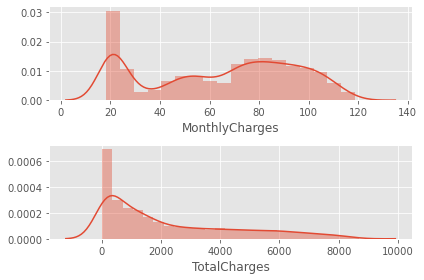

In [16]:
fig, ax=plt.subplots(2,1, figsize=(6,4))
sns.distplot(data['MonthlyCharges'], ax=ax[0])
sns.distplot(data['TotalCharges'], ax=ax[1])
plt.tight_layout();

**Monthly charges span anywhere between 18 to 118 dollars per customer with a huge proportion of customers on $20 segment**

**Total charges spans from 0 to 10000 dollars with mojorith of customers on 0 to $1000. Customers decreases with increasing total charges**

# **Analyze the churn rate by categorical variables**

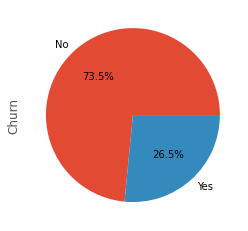

In [17]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%');

**_A preliminary look at the overall churn rate shows that around 74% of the customers are active. As shown in the chart below, this is an imbalanced classification problem. Machine learning algorithms work well when the number of instances of each class is roughly equal. The data is skewed_**

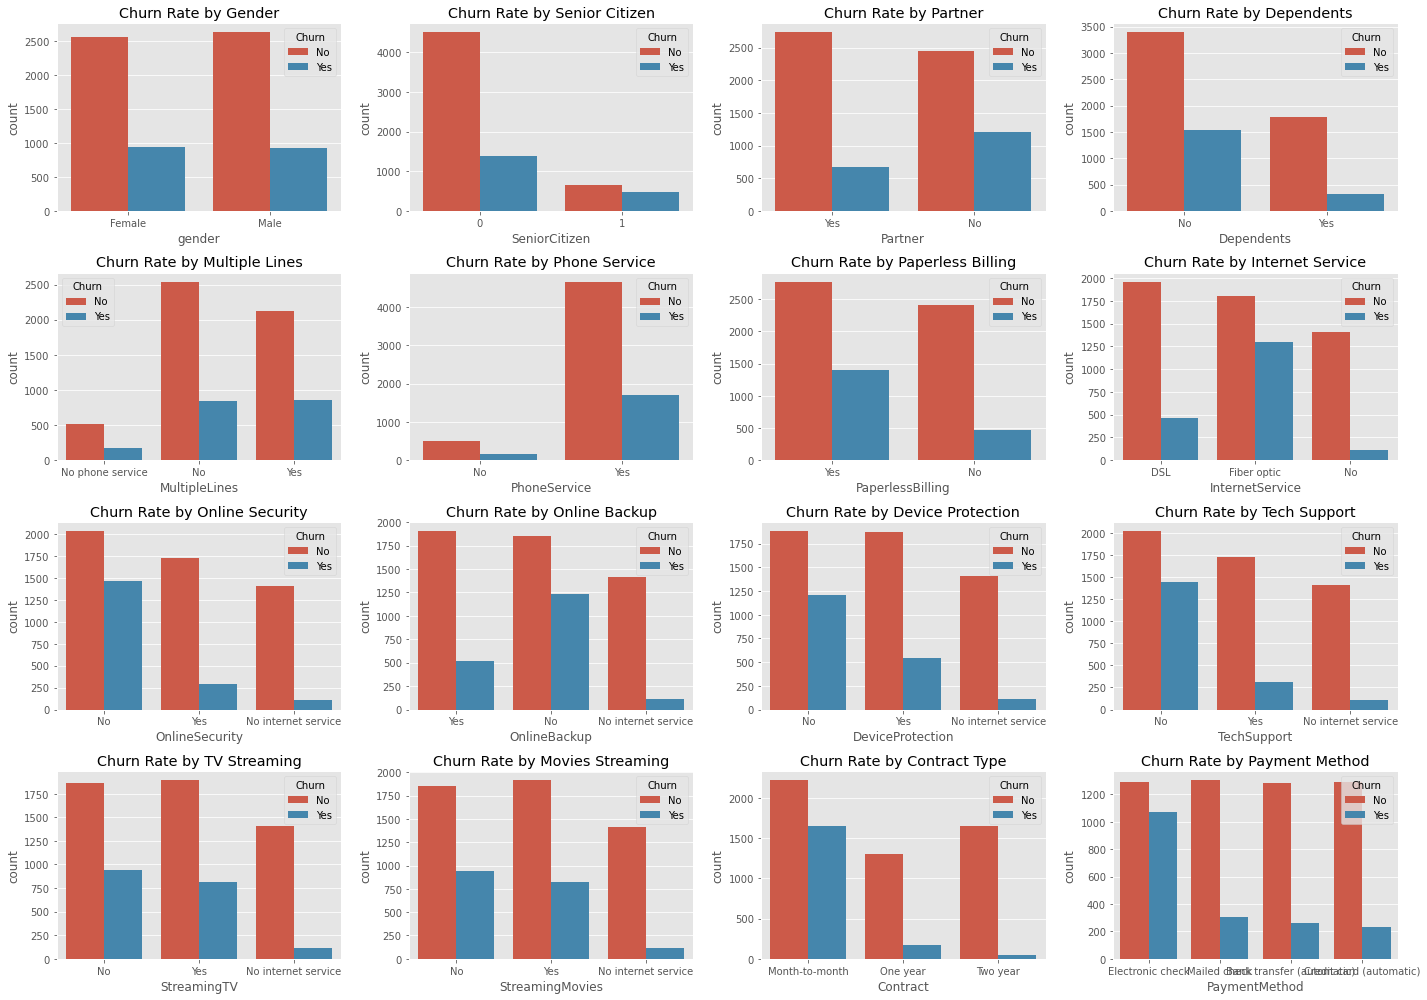

In [18]:
fig, ax=plt.subplots(4,4, figsize=(20,14))
sns.countplot(data['gender'], hue=data['Churn'], ax=ax[0,0]).set_title('Churn Rate by Gender')
sns.countplot(data['SeniorCitizen'],hue=data['Churn'], ax=ax[0,1]).set_title('Churn Rate by Senior Citizen')
sns.countplot(data['Partner'], hue=data['Churn'],ax=ax[0,2]).set_title('Churn Rate by Partner')
sns.countplot(data['Dependents'],hue=data['Churn'], ax=ax[0,3]).set_title('Churn Rate by Dependents')
sns.countplot(data['MultipleLines'],hue=data['Churn'], ax=ax[1,0]).set_title('Churn Rate by Multiple Lines')
sns.countplot(data['PhoneService'],hue=data['Churn'], ax=ax[1,1]).set_title('Churn Rate by Phone Service')
sns.countplot(data['PaperlessBilling'],hue=data['Churn'], ax=ax[1,2]).set_title('Churn Rate by Paperless Billing')
sns.countplot(data['InternetService'],hue=data['Churn'], ax=ax[1,3]).set_title('Churn Rate by Internet Service')
sns.countplot(data['OnlineSecurity'], hue=data['Churn'],ax=ax[2,0]).set_title('Churn Rate by Online Security')
sns.countplot(data['OnlineBackup'], hue=data['Churn'],ax=ax[2,1]).set_title('Churn Rate by Online Backup')
sns.countplot(data['DeviceProtection'],hue=data['Churn'], ax=ax[2,2]).set_title('Churn Rate by Device Protection')
sns.countplot(data['TechSupport'],hue=data['Churn'], ax=ax[2,3]).set_title('Churn Rate by Tech Support')
sns.countplot(data['StreamingTV'],hue=data['Churn'], ax=ax[3,0]).set_title('Churn Rate by TV Streaming')
sns.countplot(data['StreamingMovies'],hue=data['Churn'], ax=ax[3,1]).set_title('Churn Rate by Movies Streaming')
sns.countplot(data['Contract'], hue=data['Churn'],ax=ax[3,2]).set_title('Churn Rate by Contract Type')
sns.countplot(data['PaymentMethod'], hue=data['Churn'],ax=ax[3,3]).set_title('Churn Rate by Payment Method')
plt.tight_layout();

<ipython-input-19-751b32216403>:19: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right', fontsize = "medium")


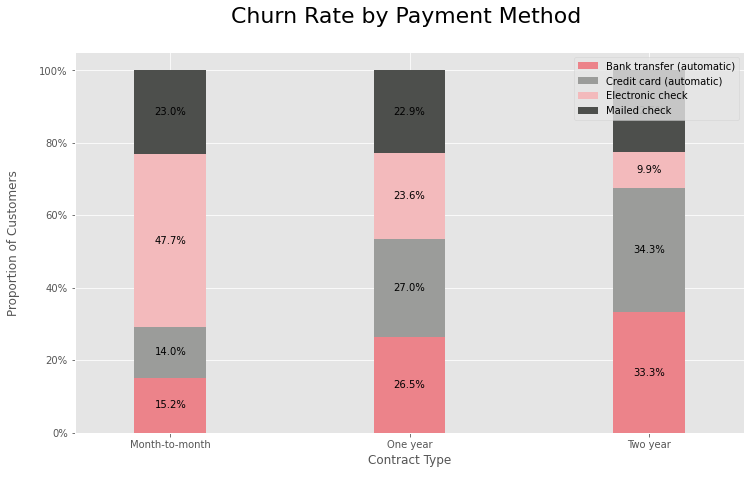

In [19]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['Contract',
'PaymentMethod']).size().unstack()
contract_churn.rename(columns=
{0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),
color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False);

**Customers with a prepaid or rather a month-to-month connection have a very high probability to churn compared to their peers on 1 or 2 years contracts**

**Customers with No Dependents, No partners and Senior Citizens have a very high probability to Churn**

**Customers who pay via electronic check seem to have the highest churn rate among all the payment method segments.**

**Customers with No Online Security, BackUp, Device Protection and Tech Support all have the highest probability to Churn**


In [20]:
# dataset2 = data[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling',
#                  'MonthlyCharges', 'TotalCharges']]
# correlations = data.corrwith(data.Churn)
# correlations = correlations[correlations!=1]
# positive_correlations = correlations[
# correlations >0].sort_values(ascending = False)
# negative_correlations =correlations[
# correlations<0].sort_values(ascending = False)
# print('Most Positive Correlations: \n', positive_correlations)
# print('\nMost Negative Correlations: \n', negative_correlations)

# correlations = dataset2.corrwith(data.Churn)
# correlations = correlations[correlations!=1]
# correlations.plot.bar(
#         figsize = (18, 10), 
#         fontsize = 15, 
#         color = '#ec838a',
#         rot = 45, grid = True)
# plt.title('Correlation with Churn Rate \n',
# horizontalalignment="center", fontstyle = "normal", 
# fontsize = "22", fontfamily = "sans-serif")

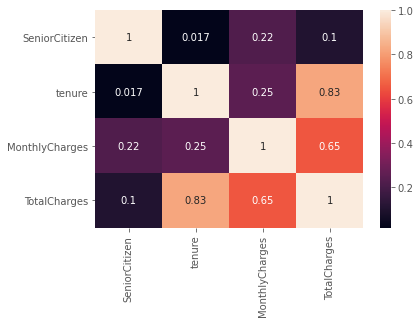

In [21]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), annot=True)

# Exploratory Data Analysis Concluding Remarks:

**The dataset does not have any missing or erroneous data values.**

**Strongest positive correlation with the target features is Monthly Charges and Age whilst negative correlation is with Partner, Dependents and Tenure.**

**The dataset is imbalanced with the majority of customers being active.**

**Most of the customers in the dataset are younger people.**

**There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old.**
**Most of the customers seem to have phone service with Monthly charges spanning between $18 to $118 per customer.**

**Customers with a month-to-month connection have a very high probability to churn that too if they have subscribed to pay via electronic checks.**

# Encode Categorical data

In [22]:
data = data.drop(columns="customerID")
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
